In [2]:
import cv2
import skin_detector
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import dlib
 
from imutils.video import VideoStream
from imutils import face_utils
import imutils

import os

In [7]:
plt.figure(figsize=(16,16))
image_path = "/tests/images/messi.jpg"
#image_path= "/Users/pavi/Desktop/Machine_Learning/sports/code/skin_detector/SkinDetector/pavi_screenshot.png"

image = cv2.imread(image_path,cv2.IMREAD_COLOR)

print(image.shape)
plt.imshow(cv2.cvtColor(image.copy(),cv2.COLOR_BGR2RGB))

AttributeError: 'NoneType' object has no attribute 'shape'

<Figure size 1152x1152 with 0 Axes>

In [6]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)
show_frame = image.copy()
left_increase_ratio = 0.05 #5%
top_increase_ratio = 0.25 #5%
for rect in rects:
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    #rectangle increased area
    left, right, top, bottom = rect.left(), rect.right(), rect.top(),rect.bottom()
    width = abs(right - left)
    height = abs(bottom - top)
    print(left, right, top, bottom)
    print(width,height)
    
    face_left = int(left - (left_increase_ratio/2)*width)
    face_top = int(top - (top_increase_ratio)*height)
    #face_right = int(right + (area_increase_ratio/2)*width)
    #face_bottom = int(bottom + (area_increase_ratio/2)*height)
    
    face_right = right
    face_bottom = bottom
    
    print(face_left, face_right, face_top, face_bottom)
    
    cv2.rectangle(show_frame,(left,top),(right,bottom),(255,255,0),3)
    cv2.rectangle(show_frame,(face_left,face_top),(face_right,face_bottom),(0,255,0),3)
    for counter,(x, y) in enumerate(shape):
        if counter==6:
            print(x,y)
        cv2.circle(show_frame, (x, y), 4, (0, 0, 255), -1)
        cv2.putText(show_frame,str(counter),(x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255,255,255),2)
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(show_frame,cv2.COLOR_BGR2RGB))
    
face = image[face_top:face_bottom,face_left:face_right]
            

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


(558, 458)


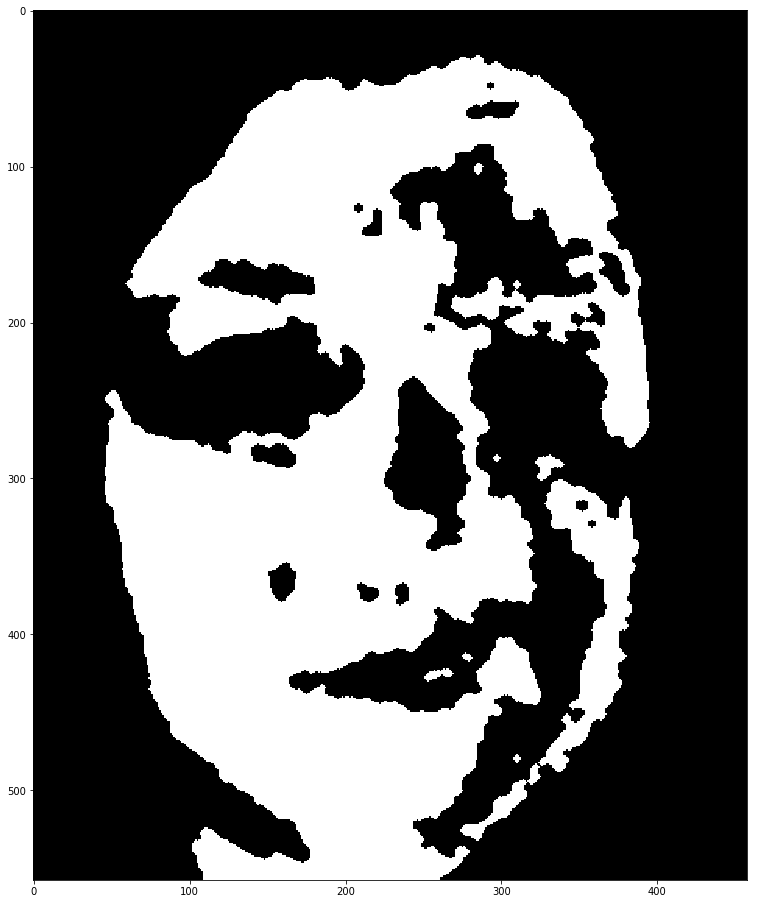

In [70]:
mask = skin_detector.process(face)
print(mask.shape)
plt.figure(figsize=(16,16))
plt.imshow(mask,cmap='gray')

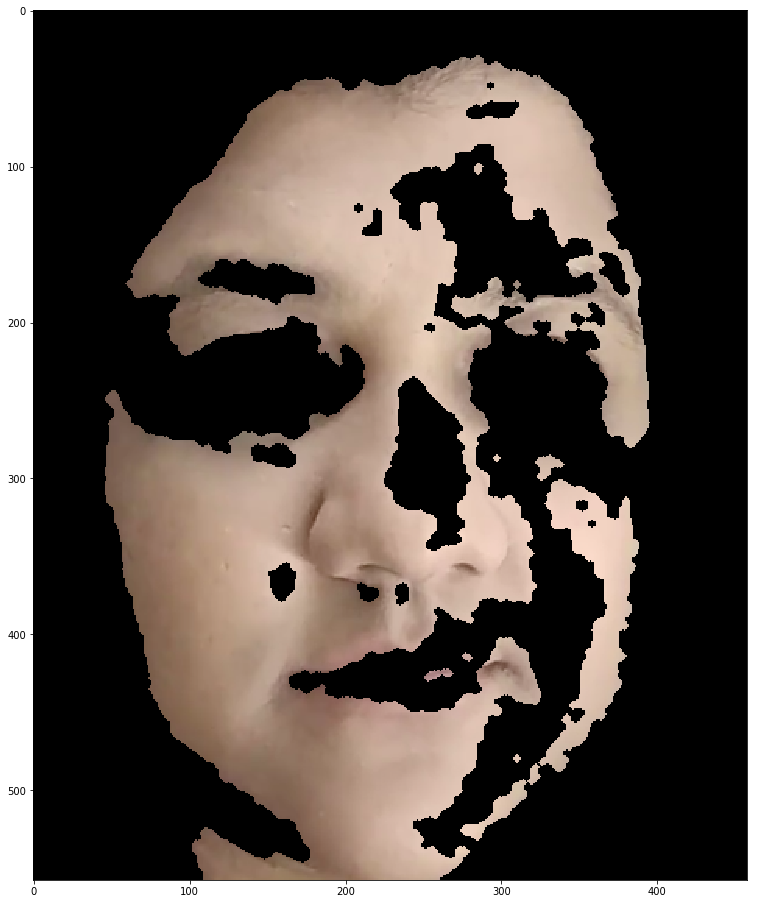

In [71]:
masked_data = cv2.bitwise_and(face, face, mask=mask)

plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(masked_data,cv2.COLOR_BGR2RGB))

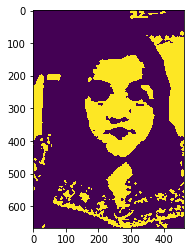